In [1]:
import numpy as np
from math import factorial
N = 5000
q_max = 100

# initialize each list as a list of 100 elements
q_list = []
U = []
M = []
omega = []
S_over_k = []

# this one is initialized at 0 because it is 
# computed iteratively and must be given a first element.
kT_mu_b = [0]
C_Nk = [None]

In [2]:
for q in range(q_max):
    q_list.append(q)
    new_omega = factorial(q + N - 1) / (factorial(q) * factorial(N - 1 ))
    omega.append(new_omega)
    S_over_k.append(np.log(new_omega))
for q in range(q_max-2):
    # starting a new loop because S_over_k needs completed
    new_kT = 2/(S_over_k[q+2] - S_over_k[q])
    kT_mu_b.append(new_kT)
    
for q in range(q_max-3):
    # again I must start a new loop
    new_C = 2/(kT_mu_b[q+2] - kT_mu_b[q])
    C_Nk.append(new_C / N)

In [3]:
# no matter what I tried I could not find a faster way than the following:
import csv
header = ['Q', 'omega', 'S over k', 'kT/epsilon', 'C/Nk']
rows = zip(q_list, omega, S_over_k, kT_mu_b, C_Nk)
with open('thermo.csv', "w", newline = '') as f:
    writer = csv.writer(f)
    writer.writerow(i for i in header)
    for row in rows:
        writer.writerow(row)

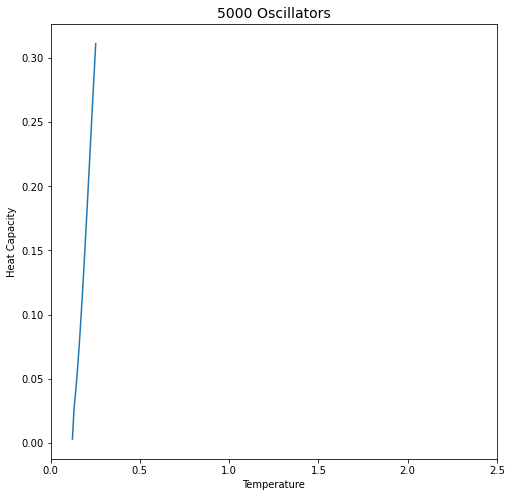

In [4]:
import matplotlib.pyplot as plt
if N == 50:
    fig, axs = plt.subplots(1,2, figsize = (12,6))
    axs[0].plot(q_list, S_over_k)
    axs[0].set_xlabel('Energy (q)')
    axs[0].set_ylabel('Entropy (S/k)')

    axs[1].plot(kT_mu_b[:-1], C_Nk)
    axs[1].set_xlabel('Temperature')
    axs[1].set_ylabel('Heat Capacity')
    fig.suptitle('50 Oscillators', size = 14)
    plt.savefig('50_oscillators')
if N == 5000:
    fig, axs = plt.subplots(1, 1, figsize = (8,8))
    axs.plot(kT_mu_b[:-1], C_Nk)
    axs.set_xlabel('Temperature')
    axs.set_ylabel('Heat Capacity')
    plt.xlim(0, 2.5)
    plt.title('5000 Oscillators', size = 14)
    plt.savefig('5000_osciallators')
# y = .5, solve for x, and find the temperature in book for metal, then solve for epsilon